<a href="https://colab.research.google.com/github/srj0222/bark/blob/master/orie560hw4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import math
!pip install pyblackscholesanalytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
from pyblackscholesanalytics.utils.numeric_routines import NumericGreeks

from pyblackscholesanalytics.options.options import PlainVanillaOption

from pyblackscholesanalytics.market.market import MarketEnvironment

mkt_env = MarketEnvironment()
Vanilla_Call = PlainVanillaOption(mkt_env)
NumGreeks = NumericGreeks(Vanilla_Call)

S_min = 50
S_max = 150
num_S = 2000
S = np.linspace(S_min, S_max, num_S)
S1 = np.linspace(S_min, S_max, num_S)

Initializing the MarketEnvironment!
Initializing the EuropeanOption!


PB 3
four plots of some of the Greeks (of your choice) for varying parameters

Initializing the MarketEnvironment!
MarketEnvironment(t=19-04-2020, r=5.0%, S_t=90.0, sigma=20.0%)
Initializing the EuropeanOption!
Initializing the EuropeanOption!
PlainVanillaOption('call', S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)
Calling the Plotter initializer!


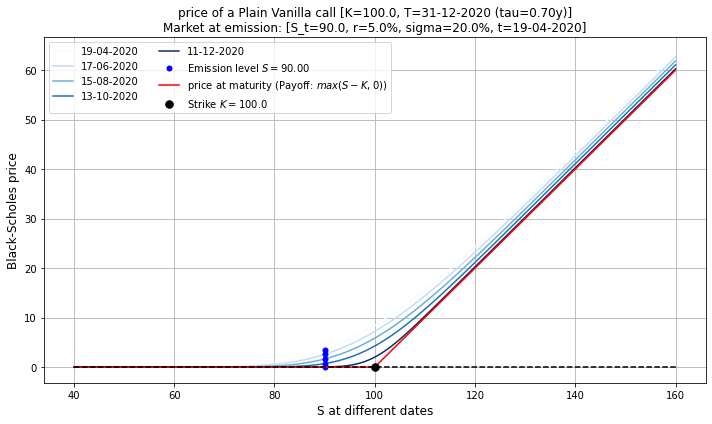

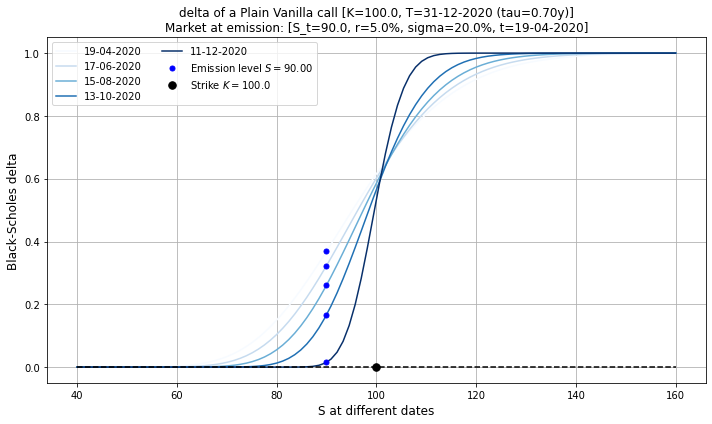

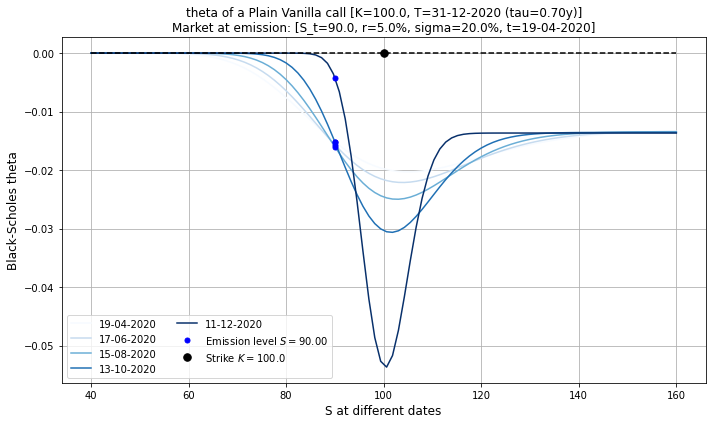

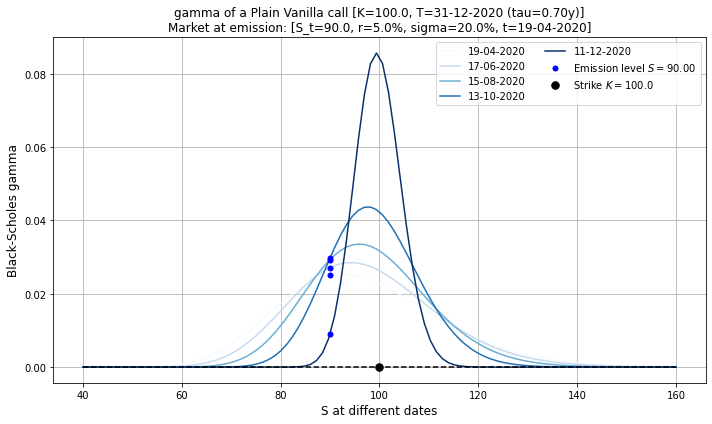

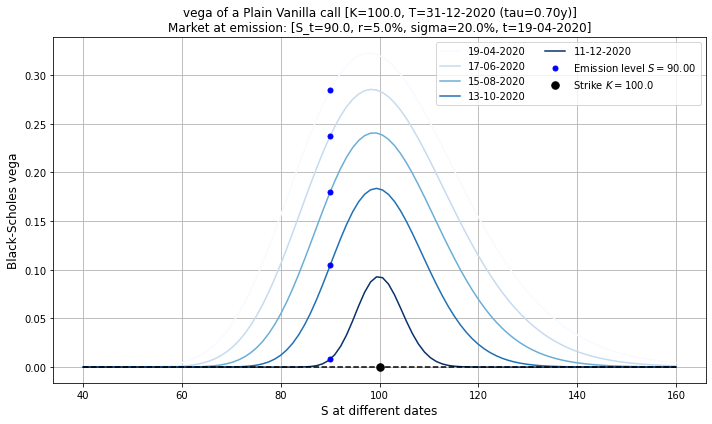

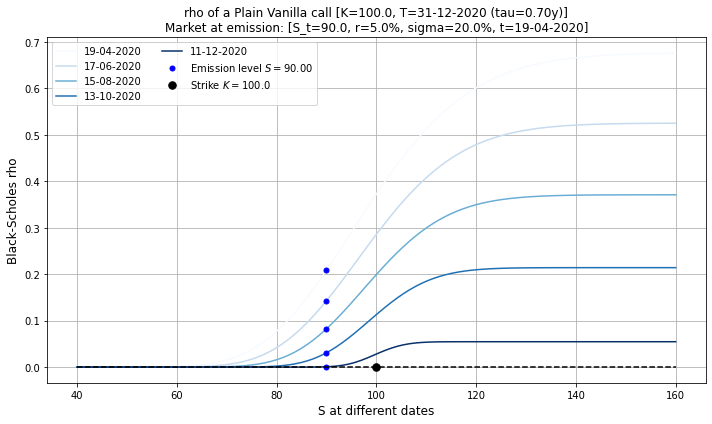

Initializing the EuropeanOption!
Initializing the EuropeanOption!
PlainVanillaOption('put', S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)
Calling the Plotter initializer!


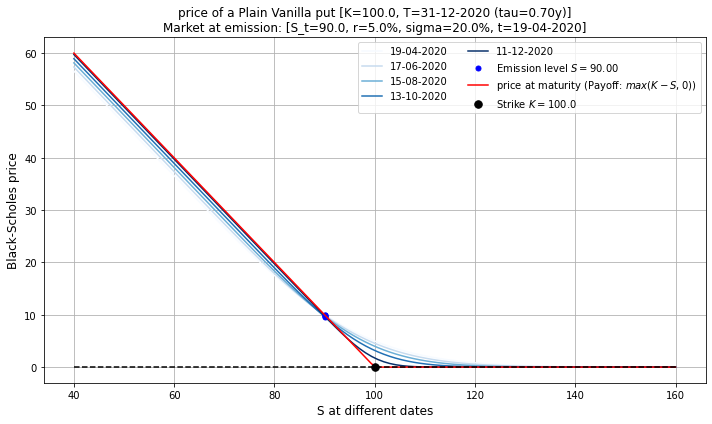

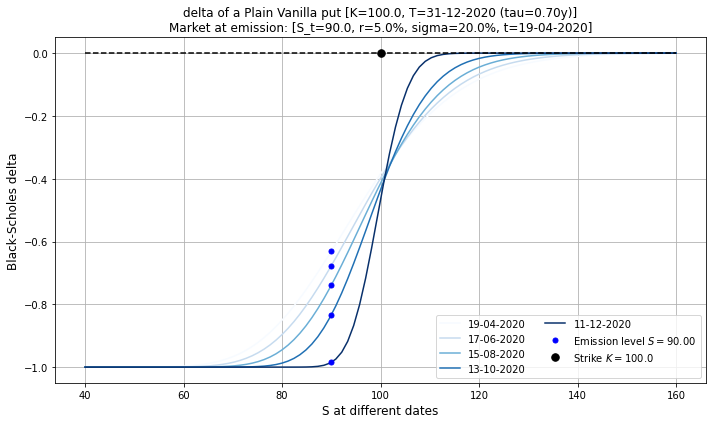

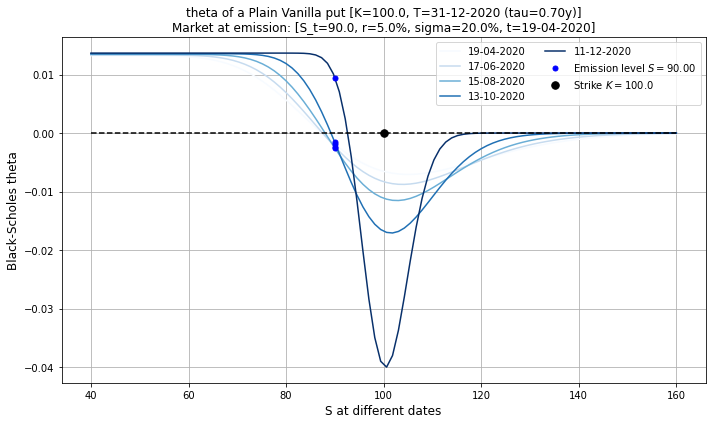

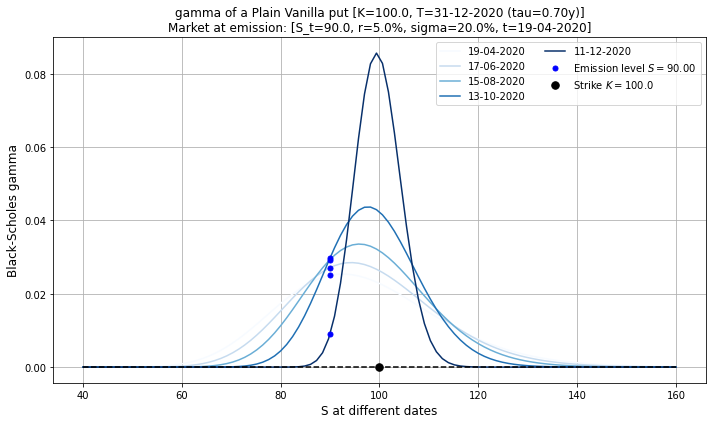

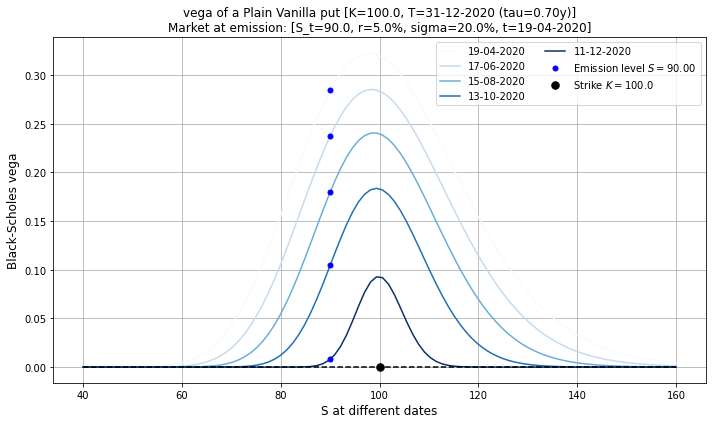

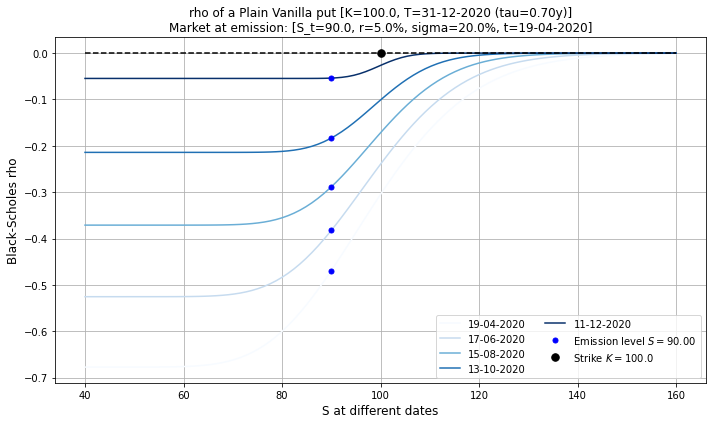

In [27]:
from pyblackscholesanalytics.plotter.plotter import OptionPlotter

def option_factory(mkt_env, plain_or_digital, option_type):
    option_dispatcher = {
        "plain_vanilla": {"call": PlainVanillaOption(mkt_env),
                          "put": PlainVanillaOption(mkt_env, option_type="put")
                          }
    }

    return option_dispatcher[plain_or_digital][option_type]


def get_time_parameter(option, kind='date'):
    # date time-parameter
    if kind == 'date':

        # valuation date of the option
        emission_date = option.get_t()

        # emission/expiration date of the option
        expiration_date = option.get_T()

        # time-parameter as a date-range of 5 valuation dates between t and T-10d
        time_parameter = pd.date_range(start=emission_date,
                                       end=expiration_date - pd.Timedelta(days=20),
                                       periods=5)

    # time-to-maturity time parameter    
    else:

        # time-parameter as a list of times-to-maturity
        time_parameter = [0.04, 1/12, 1/4 ]

    return time_parameter


def main():
    # vanilla call implementation example

    # default market environment
    market_env = MarketEnvironment()
    print(market_env)

    # define option style and type
    opt_style = "plain_vanilla" 
    opt_type = ["call","put"] 
    for i in opt_type:
      option = option_factory(market_env, opt_style, i)
      print(option)

      # option plotter instance
      plotter = OptionPlotter(option)

      # valuation date of the option
      emission_date = option.get_t()
      #print(emission_date)

      # select metrics to plot
      for plot_metrics in ["price","delta", "theta", "gamma", "vega", "rho"]:

          plot_details_flag = True if plot_metrics == "price" else False
          '''
          # Plot at t
          plotter.plot(t=[emission_date], plot_metrics=plot_metrics,
                      plot_details=plot_details_flag)

          # Plot at another date-string date
          plotter.plot(t="01-06-2020", plot_metrics=plot_metrics,
                      plot_details=plot_details_flag)'''

          for time_kind in ['date']:#, 'tau']:
              # set time-parameter to plot
              multiple_valuation_dates = get_time_parameter(option, kind=time_kind)

              # Plot at multiple dates
              plotter.plot(t=multiple_valuation_dates, plot_metrics=plot_metrics)


# ----------------------------- usage example ---------------------------------#
if __name__ == "__main__":
    main()